# Using Mean Squared Error

# $$MSE = \frac{1}{mn}\sum_{i=0}^{m-1}\sum_{j=0}^{n-1}[I(i,j) - K(i,j)]^2$$

 - sum of the squared difference between the two images

# Using Structural Similarity Measure

# $$SSIM(x, y) = \frac{(2u_xu_y + c_1)(2\sigma_{xy} + c_2)}{(u_x^2 + u_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)}$$

* The SSIM method is clearly more involved than the MSE method, but the gist is that SSIM attempts to model the perceived change in the structural information of the image, whereas MSE is actually estimating the perceived errors.

# Using Histogram Comparison

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

In [2]:
def mse_func(image1, image2):
    err = np.sum((image1.astype(np.float32) - image2.astype(np.float32)) ** 2)
    err /= np.float32(image1.shape[0] * image2.shape[1])
    
    return err

# Image comparison

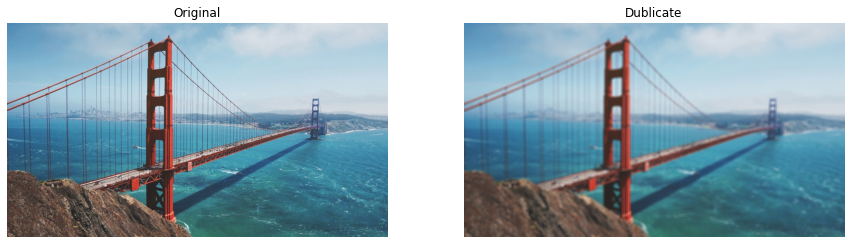

In [3]:
img1 = cv2.imread("data/GodlebBridge1.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.blur(img1, (8,8))

img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2_hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(15, 12))

plt.subplot(121)
plt.imshow(img1)
plt.title("Original")
plt.axis("off")

plt.subplot(122)
plt.imshow(img2)
plt.title("Dublicate")
plt.axis("off")

plt.show()

In [4]:
# Histogram comparison
hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [180,256], [0,180,0,256])
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);

HistCompare = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA)
MSE_func = mse_func(img1, img2) / 100.0
MSE = mse(img1, img2) / 100.0
SSIM = ssim(img1, img2, multichannel=True)

print("MSE from skimage : %f\nMSE function : %f\nSSIM : %f\nHistogram Comparison : %f" % (MSE, MSE_func, SSIM, HistCompare))

MSE from skimage : 2.082699
MSE function : 6.248096
SSIM : 0.667530
Histogram Comparison : 0.293604
